# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import MultiStepLR

np.random.seed(1234)

In [51]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [52]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [53]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [54]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


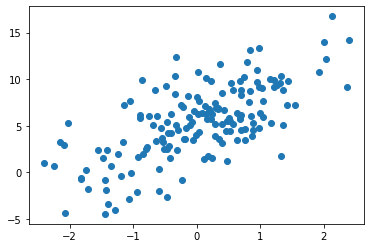

In [55]:
plt.scatter(x_train, y_train)

In [56]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [57]:
inputDim = 1
hidden_sizes = 100
outputDim = 1      
learningRate = 0.01 
epochs = 501



In [58]:
criterion = torch.nn.MSELoss() 

In [59]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, momentum=0.95)
    scheduler = MultiStepLR(optimizer, milestones=[100, 501], gamma=0.1)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 47.460174560546875
h: 2 | epoch: 50, loss: 9.406830787658691
h: 2 | epoch: 100, loss: 8.638692855834961
h: 2 | epoch: 150, loss: 8.557909965515137
h: 2 | epoch: 200, loss: 8.552607536315918
h: 2 | epoch: 250, loss: 8.552326202392578
h: 2 | epoch: 300, loss: 8.552279472351074
h: 2 | epoch: 350, loss: 8.55224895477295
h: 2 | epoch: 400, loss: 8.552220344543457
h: 2 | epoch: 450, loss: 8.552192687988281
h: 2 | epoch: 500, loss: 8.552166938781738
h: 3 | epoch: 0, loss: 43.85154724121094
h: 3 | epoch: 50, loss: 10.999682426452637
h: 3 | epoch: 100, loss: 8.608075141906738
h: 3 | epoch: 150, loss: 8.427621841430664
h: 3 | epoch: 200, loss: 8.421722412109375
h: 3 | epoch: 250, loss: 8.420559883117676
h: 3 | epoch: 300, loss: 8.420340538024902
h: 3 | epoch: 350, loss: 8.420186996459961
h: 3 | epoch: 400, loss: 8.42006778717041
h: 3 | epoch: 450, loss: 8.419971466064453
h: 3 | epoch: 500, loss: 8.419897079467773
h: 4 | epoch: 0, loss: 41.99910354614258
h: 4 | epoch: 50, l

h: 19 | epoch: 200, loss: 7.997018337249756
h: 19 | epoch: 250, loss: 7.993701934814453
h: 19 | epoch: 300, loss: 7.99137020111084
h: 19 | epoch: 350, loss: 7.989683628082275
h: 19 | epoch: 400, loss: 7.988058567047119
h: 19 | epoch: 450, loss: 7.986478328704834
h: 19 | epoch: 500, loss: 7.9849371910095215
h: 20 | epoch: 0, loss: 52.45978546142578
h: 20 | epoch: 50, loss: 8.85882568359375
h: 20 | epoch: 100, loss: 8.433578491210938
h: 20 | epoch: 150, loss: 8.380133628845215
h: 20 | epoch: 200, loss: 8.362062454223633
h: 20 | epoch: 250, loss: 8.347015380859375
h: 20 | epoch: 300, loss: 8.344653129577637
h: 20 | epoch: 350, loss: 8.34212589263916
h: 20 | epoch: 400, loss: 8.340192794799805
h: 20 | epoch: 450, loss: 8.338602066040039
h: 20 | epoch: 500, loss: 8.33799934387207
h: 21 | epoch: 0, loss: 46.27276611328125
h: 21 | epoch: 50, loss: 8.676942825317383
h: 21 | epoch: 100, loss: 8.019346237182617
h: 21 | epoch: 150, loss: 8.001382827758789
h: 21 | epoch: 200, loss: 7.9940223693847

h: 36 | epoch: 300, loss: 8.143919944763184
h: 36 | epoch: 350, loss: 8.128458023071289
h: 36 | epoch: 400, loss: 8.115158081054688
h: 36 | epoch: 450, loss: 8.102571487426758
h: 36 | epoch: 500, loss: 8.088486671447754
h: 37 | epoch: 0, loss: 45.062095642089844
h: 37 | epoch: 50, loss: 9.168828010559082
h: 37 | epoch: 100, loss: 8.228551864624023
h: 37 | epoch: 150, loss: 8.14236831665039
h: 37 | epoch: 200, loss: 8.123653411865234
h: 37 | epoch: 250, loss: 8.109292984008789
h: 37 | epoch: 300, loss: 8.096307754516602
h: 37 | epoch: 350, loss: 8.085037231445312
h: 37 | epoch: 400, loss: 8.07451057434082
h: 37 | epoch: 450, loss: 8.064765930175781
h: 37 | epoch: 500, loss: 8.055679321289062
h: 38 | epoch: 0, loss: 43.916465759277344
h: 38 | epoch: 50, loss: 8.454030990600586
h: 38 | epoch: 100, loss: 8.059910774230957
h: 38 | epoch: 150, loss: 7.989199638366699
h: 38 | epoch: 200, loss: 7.97360897064209
h: 38 | epoch: 250, loss: 7.967541694641113
h: 38 | epoch: 300, loss: 7.96341323852

h: 53 | epoch: 350, loss: 8.208061218261719
h: 53 | epoch: 400, loss: 8.196150779724121
h: 53 | epoch: 450, loss: 8.184606552124023
h: 53 | epoch: 500, loss: 8.17257022857666
h: 54 | epoch: 0, loss: 50.6309700012207
h: 54 | epoch: 50, loss: 8.580787658691406
h: 54 | epoch: 100, loss: 8.400152206420898
h: 54 | epoch: 150, loss: 8.36620044708252
h: 54 | epoch: 200, loss: 8.354890823364258
h: 54 | epoch: 250, loss: 8.34611701965332
h: 54 | epoch: 300, loss: 8.338052749633789
h: 54 | epoch: 350, loss: 8.326742172241211
h: 54 | epoch: 400, loss: 8.316473007202148
h: 54 | epoch: 450, loss: 8.302435874938965
h: 54 | epoch: 500, loss: 8.289891242980957
h: 55 | epoch: 0, loss: 49.570152282714844
h: 55 | epoch: 50, loss: 8.396269798278809
h: 55 | epoch: 100, loss: 8.041727066040039
h: 55 | epoch: 150, loss: 7.997053623199463
h: 55 | epoch: 200, loss: 7.9781694412231445
h: 55 | epoch: 250, loss: 7.966135501861572
h: 55 | epoch: 300, loss: 7.95758056640625
h: 55 | epoch: 350, loss: 7.9506096839904

h: 70 | epoch: 400, loss: 8.24394702911377
h: 70 | epoch: 450, loss: 8.236982345581055
h: 70 | epoch: 500, loss: 8.230606079101562
h: 71 | epoch: 0, loss: 45.418399810791016
h: 71 | epoch: 50, loss: 8.673982620239258
h: 71 | epoch: 100, loss: 8.251347541809082
h: 71 | epoch: 150, loss: 8.194250106811523
h: 71 | epoch: 200, loss: 8.17945384979248
h: 71 | epoch: 250, loss: 8.167222023010254
h: 71 | epoch: 300, loss: 8.155684471130371
h: 71 | epoch: 350, loss: 8.144697189331055
h: 71 | epoch: 400, loss: 8.134256362915039
h: 71 | epoch: 450, loss: 8.124216079711914
h: 71 | epoch: 500, loss: 8.114519119262695
h: 72 | epoch: 0, loss: 40.29460525512695
h: 72 | epoch: 50, loss: 9.134035110473633
h: 72 | epoch: 100, loss: 8.373250961303711
h: 72 | epoch: 150, loss: 8.293708801269531
h: 72 | epoch: 200, loss: 8.274795532226562
h: 72 | epoch: 250, loss: 8.25858211517334
h: 72 | epoch: 300, loss: 8.243060111999512
h: 72 | epoch: 350, loss: 8.227084159851074
h: 72 | epoch: 400, loss: 8.212315559387

h: 87 | epoch: 450, loss: 8.14722728729248
h: 87 | epoch: 500, loss: 8.13584041595459
h: 88 | epoch: 0, loss: 48.511573791503906
h: 88 | epoch: 50, loss: 9.233532905578613
h: 88 | epoch: 100, loss: 8.282994270324707
h: 88 | epoch: 150, loss: 8.219709396362305
h: 88 | epoch: 200, loss: 8.198923110961914
h: 88 | epoch: 250, loss: 8.182111740112305
h: 88 | epoch: 300, loss: 8.166878700256348
h: 88 | epoch: 350, loss: 8.152758598327637
h: 88 | epoch: 400, loss: 8.139917373657227
h: 88 | epoch: 450, loss: 8.12839412689209
h: 88 | epoch: 500, loss: 8.117959976196289
h: 89 | epoch: 0, loss: 40.332462310791016
h: 89 | epoch: 50, loss: 9.250678062438965
h: 89 | epoch: 100, loss: 8.163629531860352
h: 89 | epoch: 150, loss: 8.11472225189209
h: 89 | epoch: 200, loss: 8.07966136932373
h: 89 | epoch: 250, loss: 8.058572769165039
h: 89 | epoch: 300, loss: 8.048823356628418
h: 89 | epoch: 350, loss: 8.040637969970703
h: 89 | epoch: 400, loss: 8.033146858215332
h: 89 | epoch: 450, loss: 8.0261697769165

In [60]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

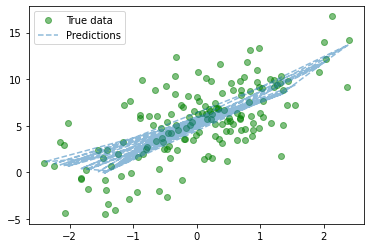

In [61]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

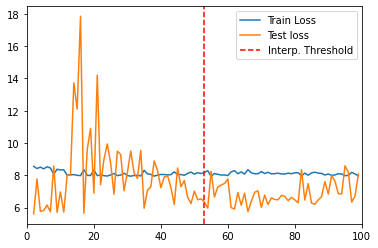

In [62]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.axvline(53, color = 'r', linestyle = '--', label = 'Interp. Threshold')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

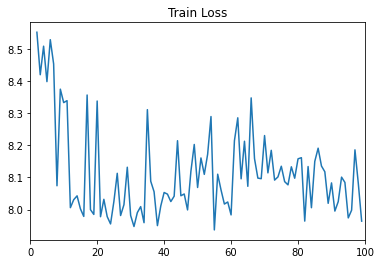

In [63]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

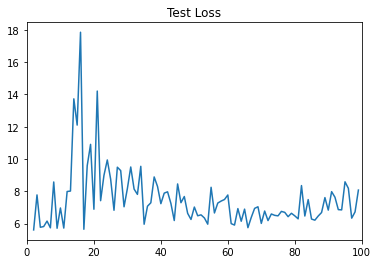

In [64]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)